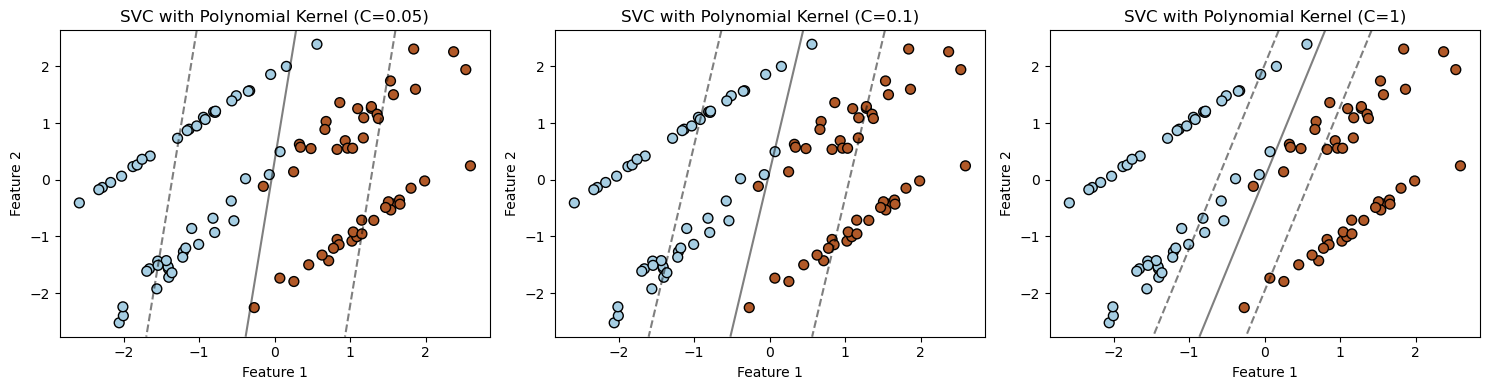

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate random data for demonstration purposes
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Values of C to loop through
C_values = [0.05, 0.1, 1]

# Create subplots
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 4))

# Loop through different values of C
for i, C in enumerate(C_values):
    clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=1, C=C))
    clf.fit(X, y)

    # Plot decision boundary and data points
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_title(f'SVC with Polynomial Kernel (C={C})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


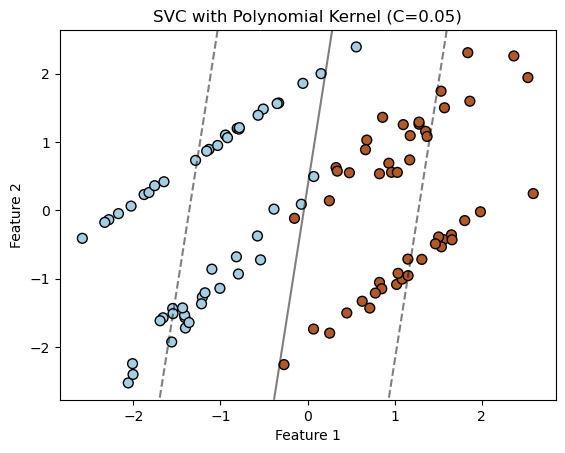

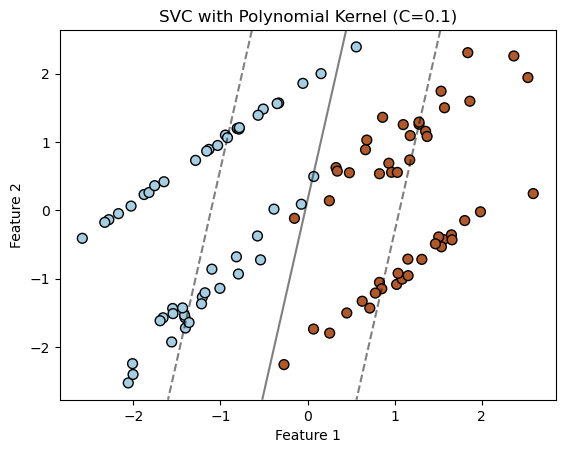

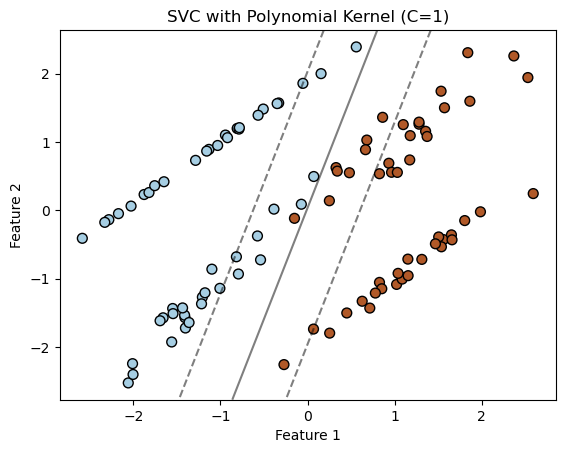

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate random data for demonstration purposes
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create a pipeline with a Polynomial Kernel Support Vector Classifier
def plot_svm(C):
    clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=1, C=C))
    clf.fit(X, y)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title(f'SVC with Polynomial Kernel (C={C})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot for different values of C
plot_svm(C=0.05)
plot_svm(C=0.1)
plot_svm(C=1)


In [4]:
np.ones(3)

array([1., 1., 1.])

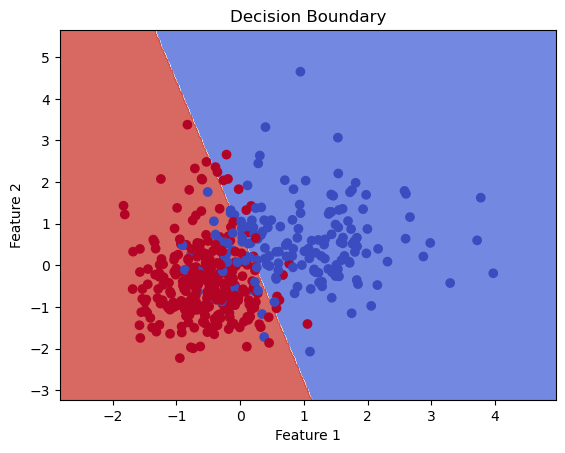

Accuracy: 0.90
Precision: 0.91
Recall: 0.94
F1 Score: 0.92
Confusion Matrix:
[[36  7]
 [ 4 67]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('wdbc.csv')

# Select two features as X and target as y
X = df[['feature1', 'feature2']]  # Replace 'feature1' and 'feature2' with actual column names
y = df['target']  # Replace 'target' with actual column name

# Scale X values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement linear support vector machine algorithm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(svm_model, X_train, y_train)

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import metrics

# Load the dataset
url = "wdbc.csv"  # Replace with the actual path
df = pd.read_csv(url)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale X values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Linear Discriminant Analysis and select the first component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Implement linear Support Vector Machine algorithm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print('Confusion Matrix:')
print(confusion_matrix)


Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790
Confusion Matrix:
[[41  2]
 [ 1 70]]


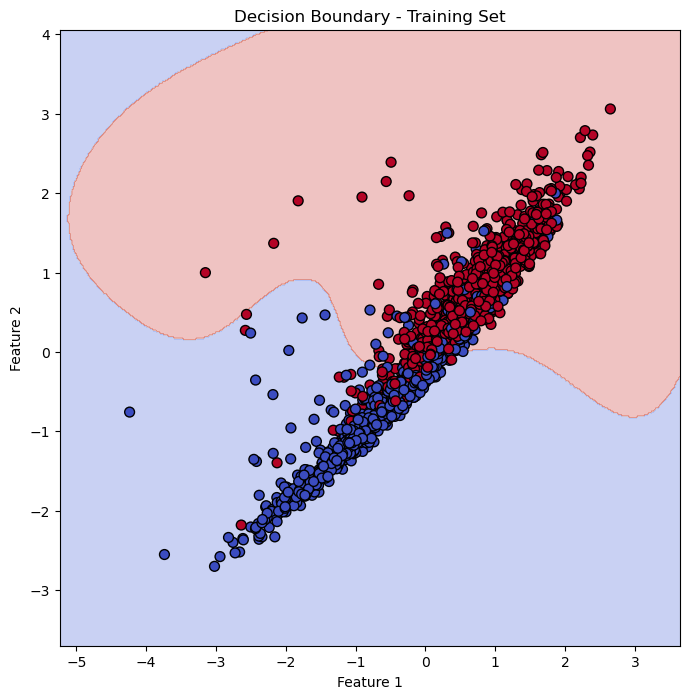

Accuracy: 0.8500
Precision: 0.8188
Recall: 0.9004
F1 Score: 0.8577
Confusion Matrix:
[[199  50]
 [ 25 226]]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

# Load the dataset
df = pd.read_csv("data.csv")  # Replace with the actual path

# Select two features as X and 'Class' as y
X = df[['Roundness', 'Compactness']]  # Replace 'feature1' and 'feature2' with your actual feature names
y = df['Class']

# Scale X values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement non-linear Support Vector Machine algorithm
svm_model = SVC(kernel='rbf')  # 'rbf' for radial basis function (non-linear kernel)
svm_model.fit(X_train, y_train)

# Plot the decision boundary (assuming X has only two features)
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_train, y_train, svm_model, 'Decision Boundary - Training Set')

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print('Confusion Matrix:')
print(confusion_matrix)
